<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/ML_Lab_Experiments/ML_Experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 7

In [ ]:
# ==========================================
# Naive Bayes Classifier on heart.csv Dataset
# ==========================================

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/ML Practical/Student_Dataset_Cleaned.csv")

In [ ]:
print("Dataset Shape:", data.shape)
print("Target class distribution:\n", data['Target'].value_counts())

Dataset Shape: (4424, 33)
Target class distribution:
 Target
0    3003
1    1421
Name: count, dtype: int64


In [ ]:
# Step 3: Split features and target
X = data.drop("Target", axis=1)
y = data["Target"]

In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 3539, Testing Samples: 885


In [ ]:
# Step 5: Feature Scaling (optional for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 6: Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
# Step 7: Predictions
y_pred = gnb.predict(X_test_scaled)
y_proba = gnb.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Step 8: Evaluate model performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8305084745762712
Precision: 0.8291012253597242
Recall: 0.8305084745762712
F1 Score: 0.8296889557736528

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       601
           1       0.74      0.72      0.73       284

    accuracy                           0.83       885
   macro avg       0.81      0.80      0.80       885
weighted avg       0.83      0.83      0.83       885




Confusion Matrix:
 [[531  70]
 [ 80 204]]


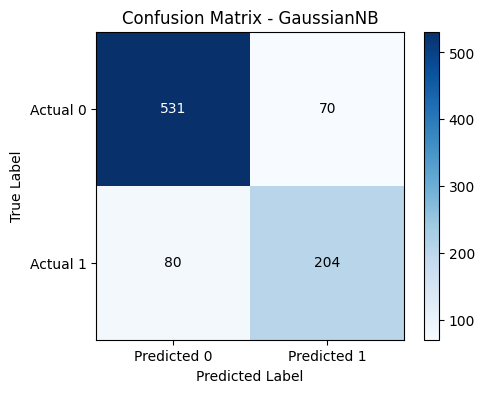

In [ ]:
# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - GaussianNB")
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')
plt.show()


ROC-AUC Score: 0.8703


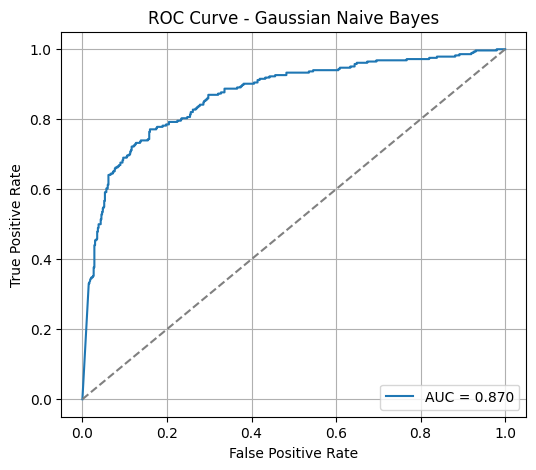

In [ ]:
# Step 10: ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Step 11: Cross-Validation
cv_scores = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Mean CV Accuracy:", cv_scores.mean().round(4), "Std:", cv_scores.std().round(4))

Cross-validation scores: [0.8008 0.8234 0.8234 0.8249 0.8006]
Mean CV Accuracy: 0.8146 Std: 0.0114


In [ ]:
# Step 12: Compare with raw (unscaled) features
gnb_raw = GaussianNB().fit(X_train, y_train)
y_pred_raw = gnb_raw.predict(X_test)
raw_acc = accuracy_score(y_test, y_pred_raw)
print(f"\nAccuracy without scaling: {raw_acc:.4f}")


Accuracy without scaling: 0.8350


In [ ]:
summary = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1_Score": f1,
    "CV_Mean": cv_scores.mean(),
    "CV_STD": cv_scores.std()
}

print("\nSummary:", {k: round(v, 4) for k, v in summary.items()})



Summary: {'Accuracy': 0.8305, 'Precision': 0.8291, 'Recall': 0.8305, 'F1_Score': 0.8297, 'CV_Mean': np.float64(0.8146), 'CV_STD': np.float64(0.0114)}
